# 8.1 문제 정의
학력, 교육 연수, 혼인 상태, 직업 정보를 담은 연봉 데이터셋을 이용해 연봉을 예측하라.

연봉 데이터를 사용합니다. 연봉이 $50,000 이상인지 이하인지 예측하는 것이 목표이며, 종속변수는 class, 독립변수로는 학력, 교육 연수, 혼인 상태, 직업 등이 있습니다.

## 8.2 라이브러리 및 데이터 불러오기, 데이터 확인하기


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'
data = pd.read_csv(file_url, skipinitialspace = True) # ❶  데이터셋 읽기

In [2]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.shape

(48842, 14)

In [4]:
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [6]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.describe(include = 'all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## 8.3 전처리 : 범주형 데이터

In [8]:
data['class'] = data['class'].map({'<=50K': 0, '>50K': 1})  # class를 숫자로 변환

In [9]:
data[['class']]

,class
0,0
1,0
2,1
3,1
4,0
...,...
48837,0
48838,1
48839,0
48840,0


In [10]:
data['age'].dtype

dtype('int64')

In [11]:
for i in data.columns:   # ❶ 순회
    print(i, data[i].dtype) # ❷ 컬럼명과 데이터 타입 출력

age int64
workclass object
education object
education-num int64
marital-status object
occupation object
relationship object
race object
sex object
capital-gain int64
capital-loss int64
hours-per-week int64
native-country object
class int64


### 8.3.1 object형 변수 정보 확인

In [12]:
obj_list = [] # 빈 리스트
for i in data.columns:
    if data[i].dtype == 'object': # ❶ 데이터타입이 object이면
        obj_list.append(i) # ❷ 리스트에 변수 이름 추가

In [13]:
obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

### 8.3.2 전처리할 변수 선별하기

In [14]:
for i in obj_list:
    print(i, data[i].nunique()) # ❶ 변수 이름과 고윳값 개수 확인

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


In [15]:
for i in obj_list:
    if data[i].nunique() >= 10:  # 변수의 고윳값이 10보다 크거나 같으면
        print(i, data[i].nunique())  # 컬럼명과 고윳값 개수 출력

education 16
occupation 14
native-country 41


### 8.3.3 education 변수 처리

In [16]:
data['education'].value_counts()  # 고윳값 출현 빈도 확인

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [17]:
np.sort(data['education-num'].unique())  # 고윳값을 오름차 순으로 확인

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [18]:
data['education-num'] == 1  # 값이 1인지 확인 - True/False로 출력됨

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Name: education-num, Length: 48842, dtype: bool

In [19]:
data[data['education-num'] == 1]  # 값이 1(True)인 행만 필터링

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
779,64,Private,Preschool,1,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
818,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,0
1029,57,NaN,Preschool,1,Separated,NaN,Not-in-family,White,Male,0,0,40,United-States,0
1059,31,Private,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,0
1489,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,0
48316,40,Private,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,0
48505,40,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,0
48640,46,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,0


In [20]:
data[data['education-num'] == 1]['education'].unique()  # education-num이 1인 데이터들의 education 고윳값 확인

array(['Preschool'], dtype=object)

In [21]:
for i in np.sort(data['education-num'].unique()):
    print(i, data[data['education-num'] == i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [22]:
data.drop('education', axis=1, inplace= True)

In [23]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


### 8.3.4 occupation 변수 처리

In [24]:
data['occupation'].value_counts()  # 고윳값 출현 빈도 확인

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

### 8.3.5 native-country 변수 처리

In [25]:
data['native-country'].value_counts()  # 고윳값 출현 빈도 확인

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [26]:
# data.groupby('native-country').mean().sort_values('class')

# 숫자형 컬럼만 선택
numeric_data = data.select_dtypes(include='number')
# native-country별 숫자형 데이터의 평균 계산
numeric_data.groupby(data['native-country']).mean().sort_values('class')

data.groupby('native-country').mean(numeric_only=True).sort_values('class')

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074


In [27]:
data[data['native-country'] == 'United-States']['class'].mean()


0.24397700310275597

In [28]:
country_group = data.groupby('native-country').mean(numeric_only=True)['class']
# 그룹별 class의 평균값을 계산하여 저장

In [29]:
country_group = country_group.reset_index()

In [30]:
country_group

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [31]:
data = data.merge(country_group, on = 'native-country', how='left')
# data와 country_group을 native-country기준으로 결합(left join)

In [32]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977


In [33]:
data.drop('native-country', axis=1, inplace=True)  # native-country 컬럼 제거
data = data.rename(columns= {'class_x': 'class', 'class_y': 'native-country'})
# 변수 이름 변환

In [34]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,0,0.243977


## 8.4 전처리 : 결측치 처리 및 더미 변수 변환

In [35]:
data.isna().mean()  # 결측치 평균

age               0.000000
workclass         0.057307
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    0.017546
dtype: float64

In [36]:
data['native-country'] = data['native-country'].fillna(-99)  # native-country컬럼 결측치를 -99로 대체

In [37]:
data['workclass'].value_counts()  # 고윳값별 출현 빈도

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [38]:
data['workclass'] = data['workclass'].fillna('Private')  # workclass컬럼 결측치를 Private로 대체

In [39]:
data['occupation'].value_counts()  # 고윳값별 출현 빈도

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [40]:
data['occupation'] = data['occupation'].fillna('Unknown')  # occupation컬럼 결측치를 Unknown으로 대체

In [41]:
data = pd.get_dummies(data, drop_first=True)  # 더미 변수로 변환

In [42]:
data

,age,education-num,capital-gain,capital-loss,hours-per-week,class,native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,7,0,0,40,0,0.243977,False,False,True,...,False,False,True,False,False,False,True,False,False,True
1,38,9,0,0,50,0,0.243977,False,False,True,...,False,False,False,False,False,False,False,False,True,True
2,28,12,0,0,40,1,0.243977,True,False,False,...,False,False,False,False,False,False,False,False,True,True
3,44,10,7688,0,40,1,0.243977,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,10,0,0,30,0,0.243977,False,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0.243977,False,False,True,...,False,False,False,False,True,False,False,False,True,False
48838,40,9,0,0,40,1,0.243977,False,False,True,...,False,False,False,False,False,False,False,False,True,True
48839,58,9,0,0,40,0,0.243977,False,False,True,...,False,False,False,True,False,False,False,False,True,False
48840,22,9,0,0,20,0,0.243977,False,False,True,...,False,False,True,False,False,False,False,False,True,True


## 8.5 모델링 및 평가하기

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size = 0.4, random_state = 100)  # 훈련셋/ 시험셋 분리

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model = DecisionTreeClassifier()  # 결정 트리 분류 모델 객체 생성
model.fit(X_train, y_train)  # 학습
pred = model.predict(X_test)  # 예측

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)  # 정확도 계산

0.8127143368992169

## 8.8 매개변수 튜닝

In [47]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

Train score: 0.9780242279474493 Test score: 0.8148641040077801


In [48]:
model = DecisionTreeClassifier(max_depth=5)  # 트리 깊이 지정
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

Train score: 0.8540180856509129 Test score: 0.8499769667809797


In [49]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

Train score: 0.8598532673605187 Test score: 0.8543276859292624


## 8.9 트리 그래프 

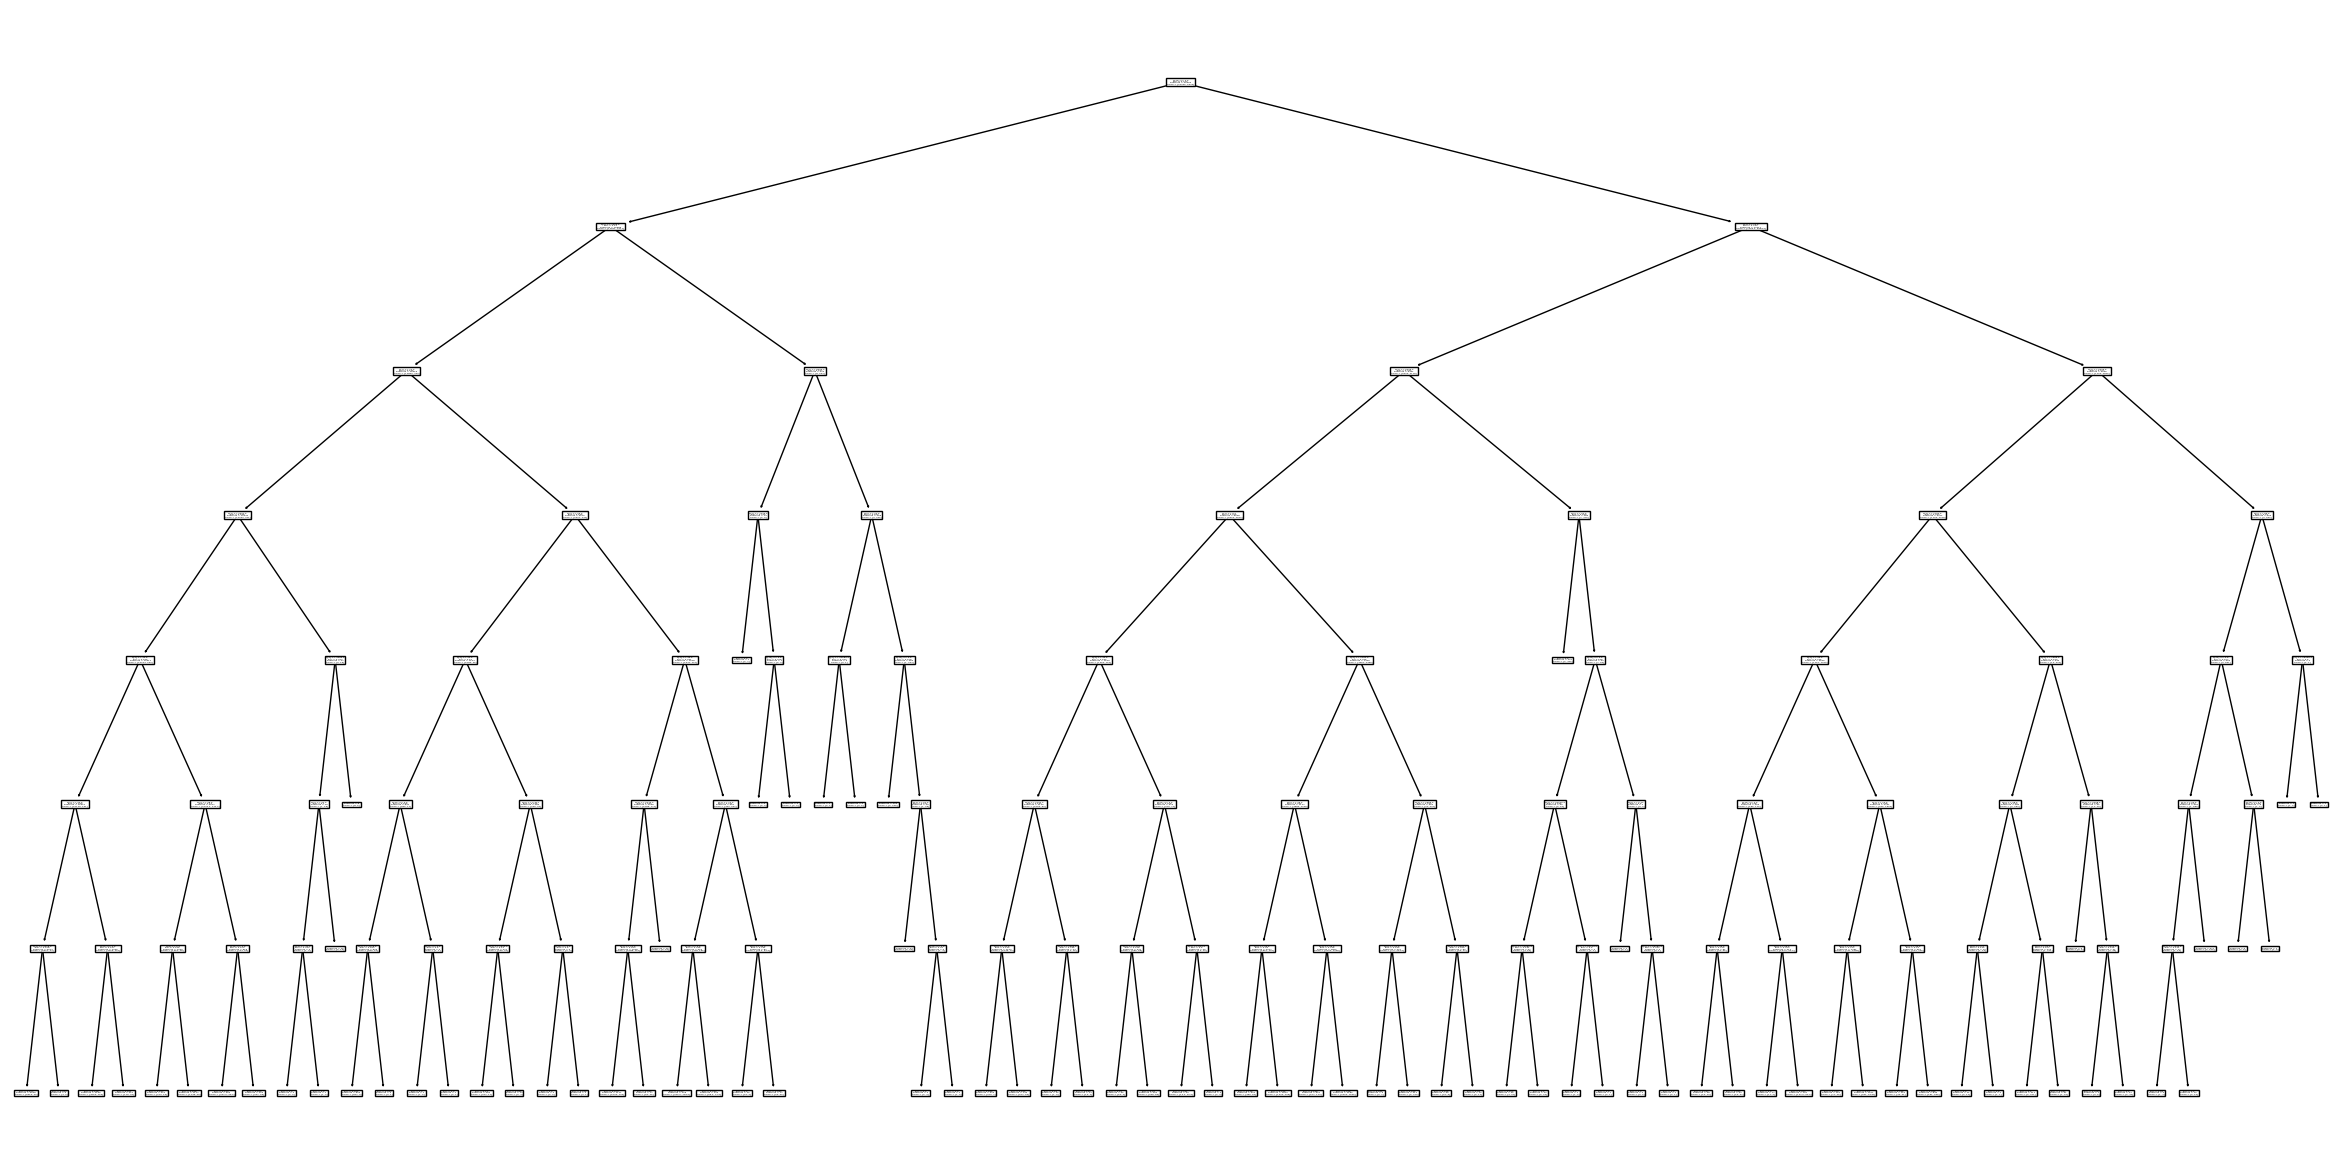

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15)) # ❶ 그래프 크기 설정
plot_tree(model) # ❷ 트리 그래프 출력
plt.show() # ❸ 불필요한 문자가 나오지 않게 출력


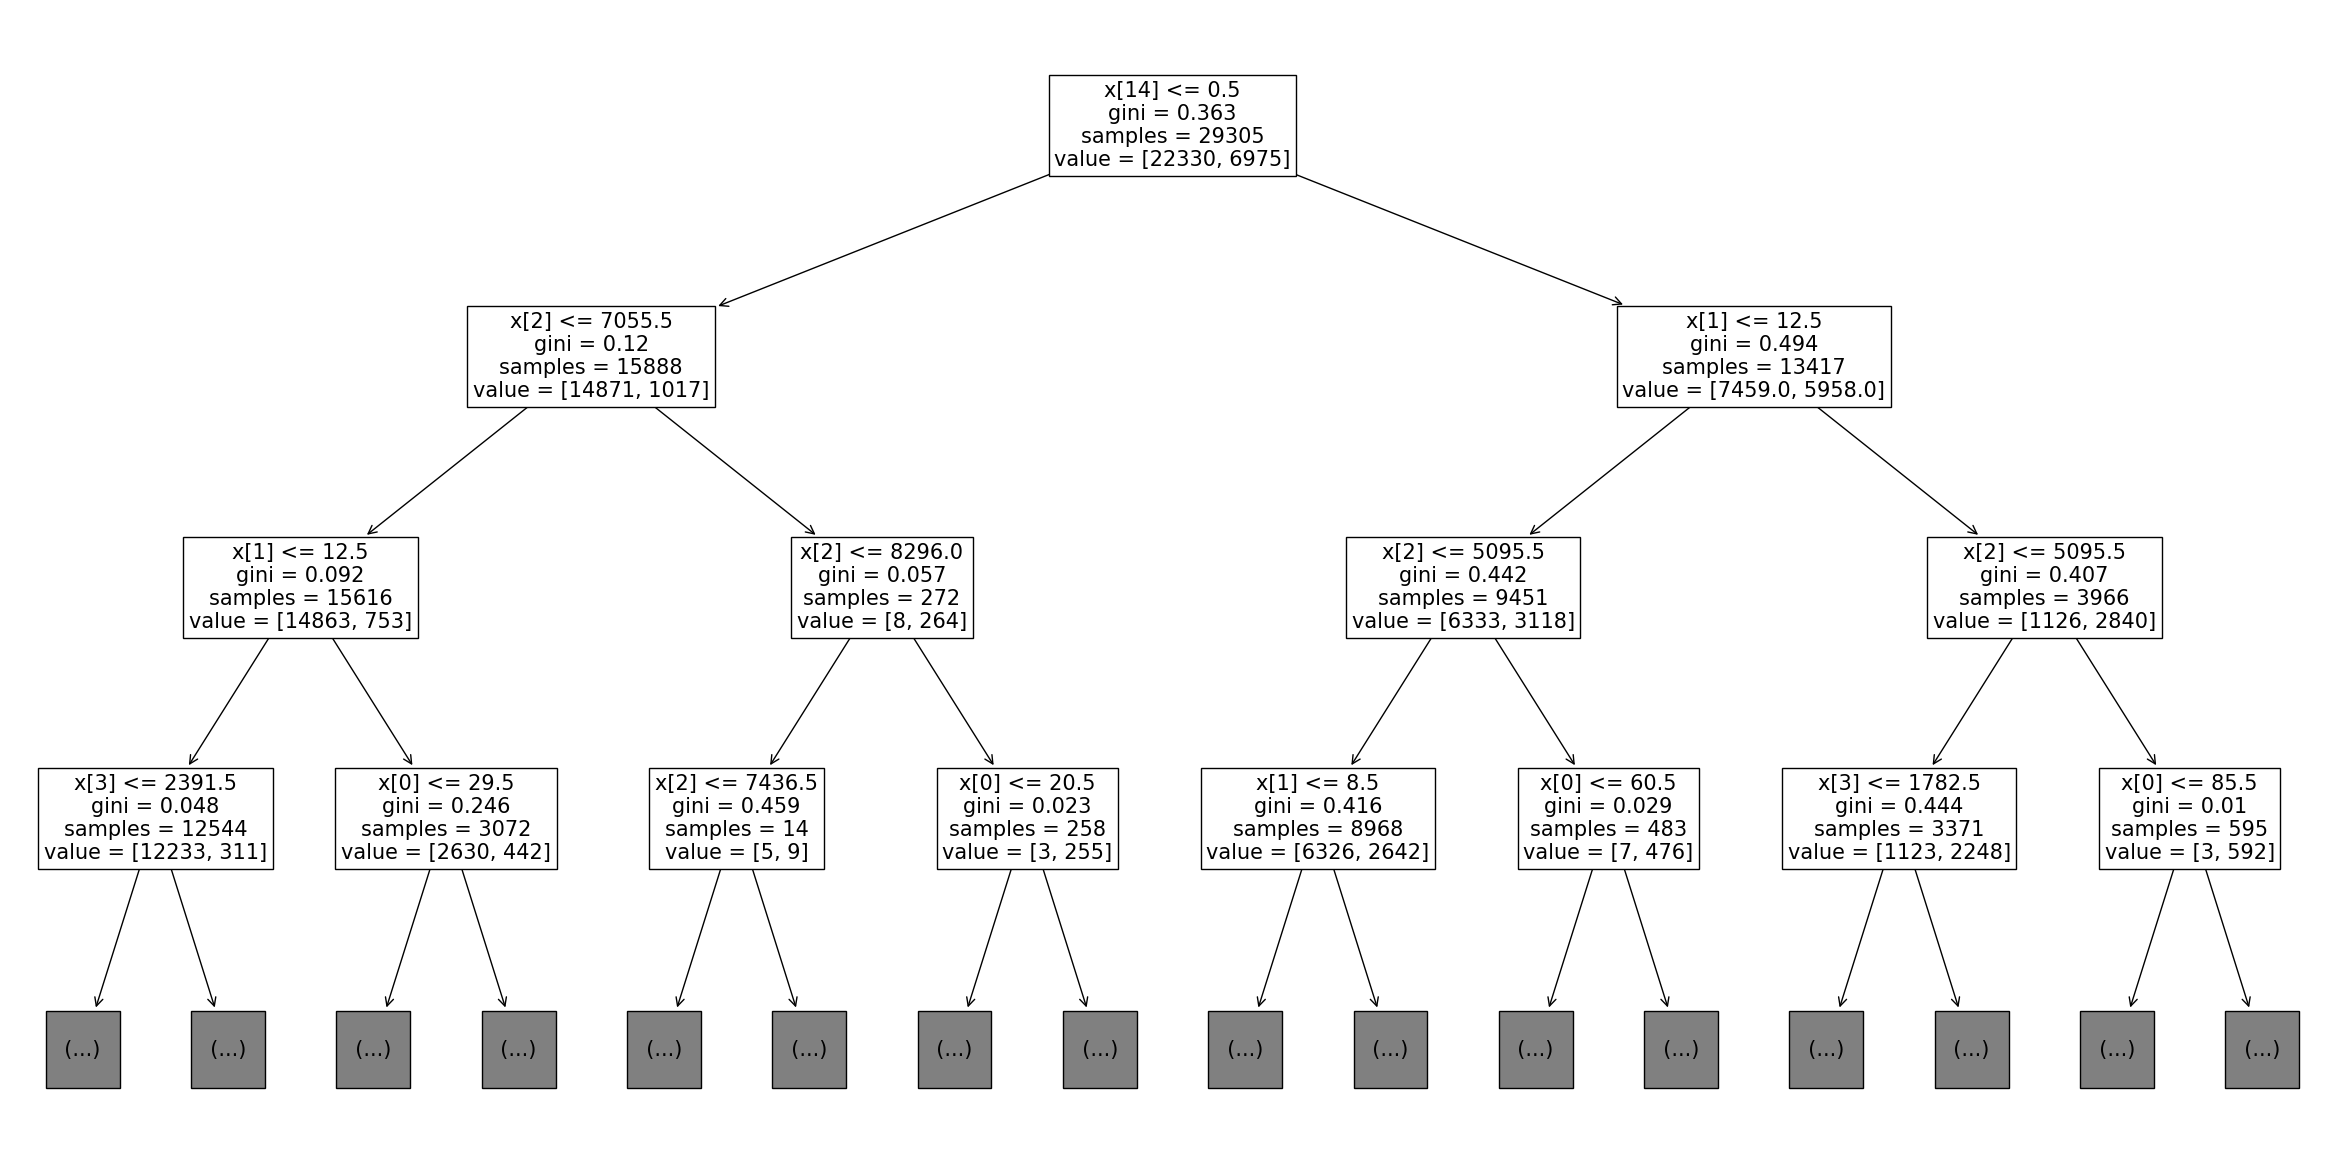

In [51]:
plt.figure(figsize=(30,15))  # 그래프 크기 지정
plot_tree(model, max_depth = 3, fontsize=15)   # 깊이와 폰트 크기 조정하여 트리 그래프 출력
plt.show()

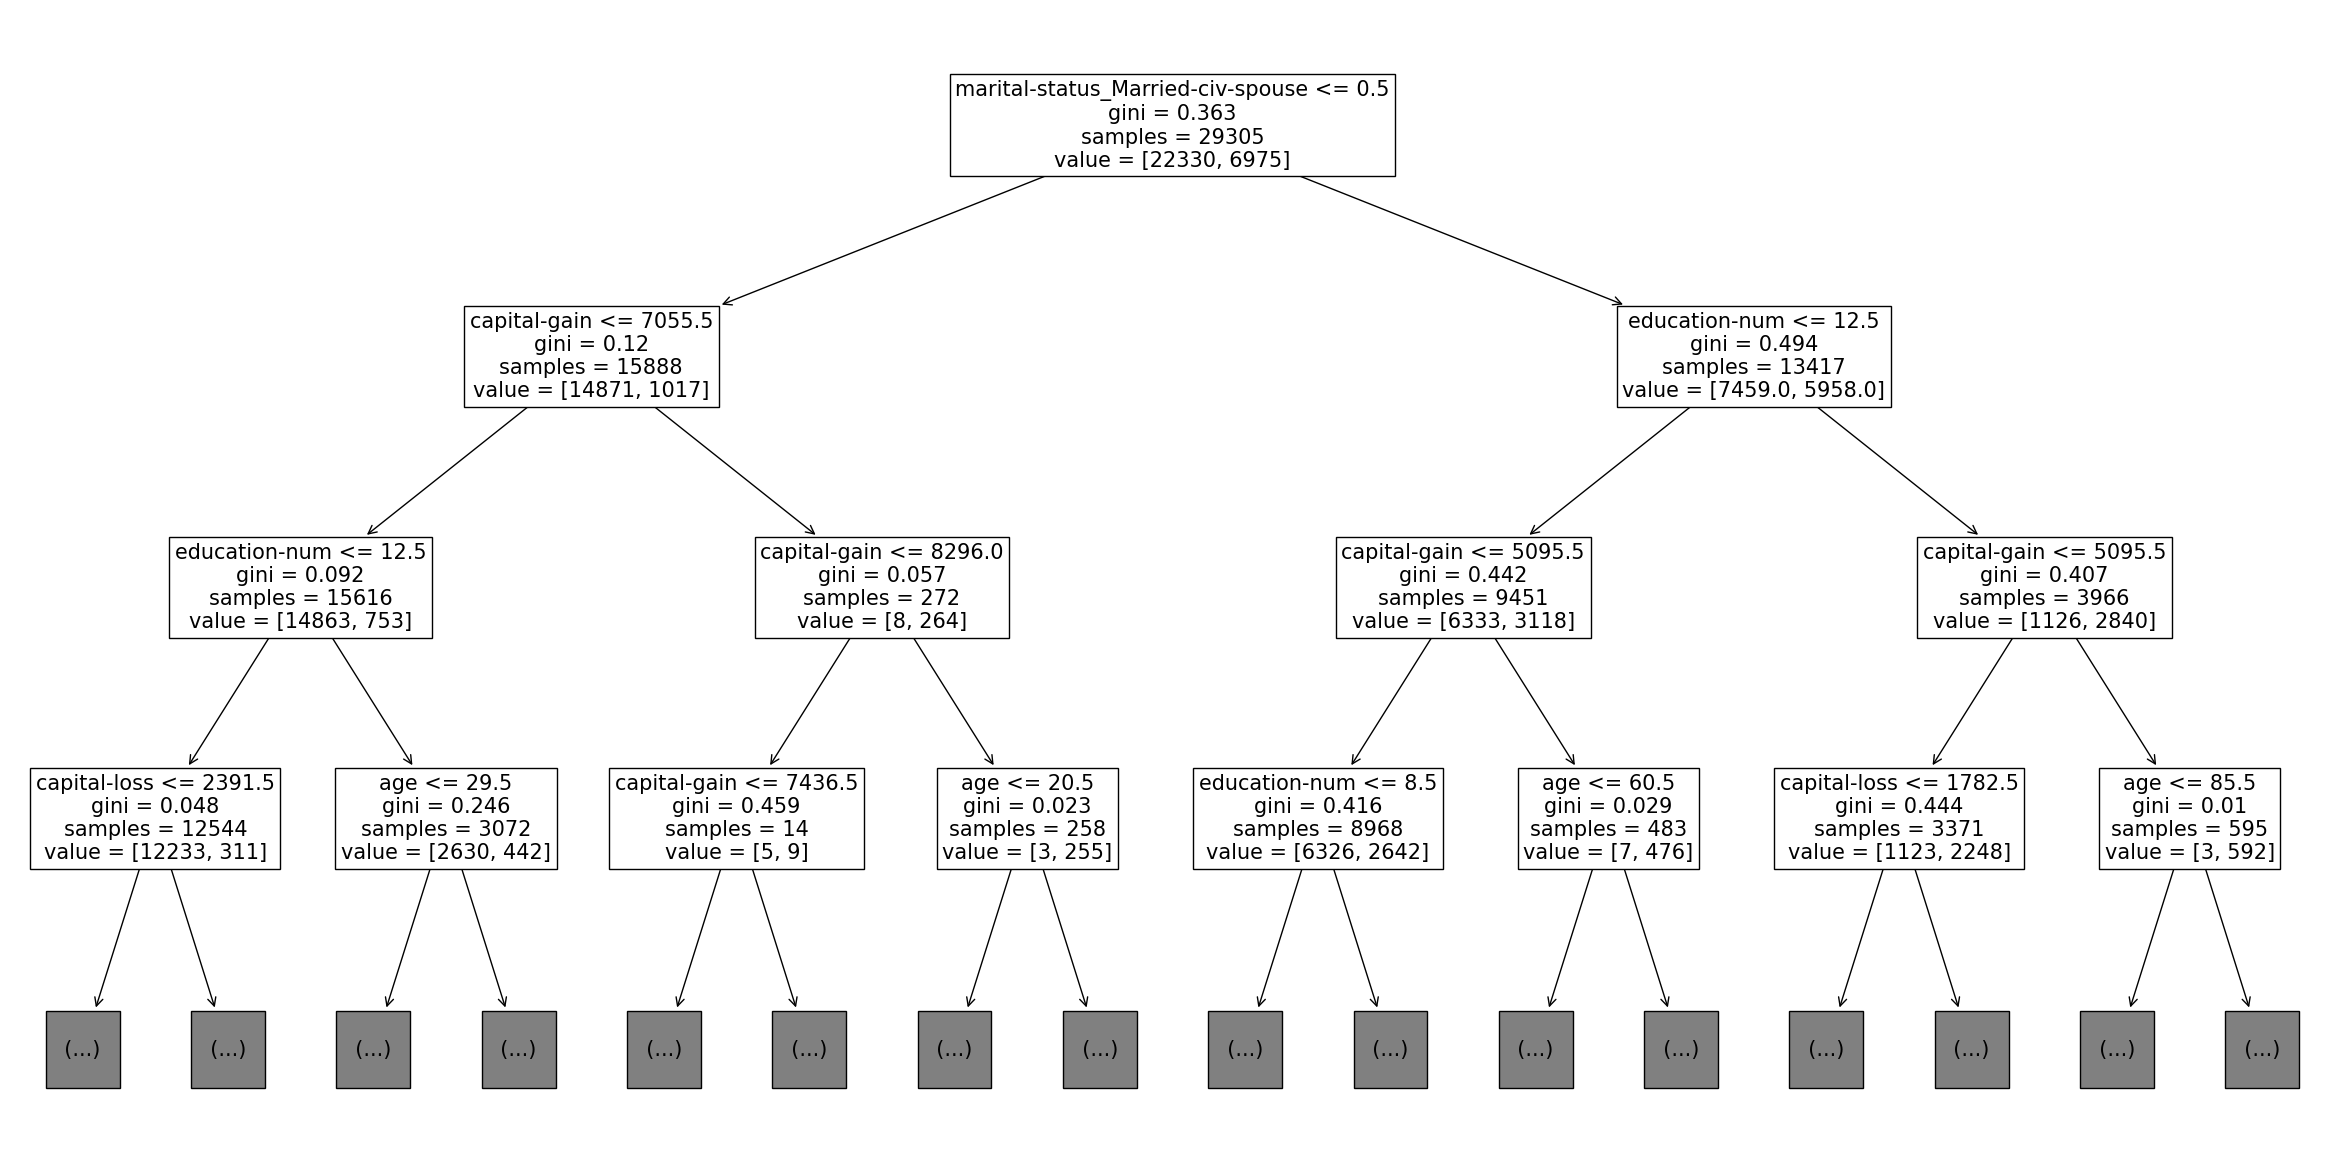

In [52]:
plt.figure(figsize=(30,15))  # 그래프 크기 지정
plot_tree(model, max_depth = 3, fontsize=15, feature_names=X_train.columns) # ❶ 변수 이름을 추가하여 그래프 출력
plt.show()